In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import patsy 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
statsDF = pd.read_csv('statsDF.csv')
statsDF = statsDF.drop(columns=['Unnamed: 0'])
statsDF.head()

,ID,Pokemon,Legendary,Stat Total,ATK Sum,DEF Sum,Height,Weight,Type 1,Type 2
0,1,bulbasaur,False,318,159,159,7,69,poison,grass
1,2,ivysaur,False,405,202,203,10,130,poison,grass
2,3,venusaur,False,525,262,263,20,1000,poison,grass
3,4,charmander,False,309,177,132,6,85,fire,NaN
4,5,charmeleon,False,405,224,181,11,190,fire,NaN


In [3]:
def convert_label(label):
    if label == True:
        return 1.0
    elif label == False:
        return 0.0
    else:
        return label

In [4]:
statsDF['Legend'] = statsDF.iloc[:, 2]
statsDF['Legend'] = statsDF['Legend'].apply(convert_label)

# Histogram with the Hypothetical Normal Distribution

In [5]:
l_height = statsDF[statsDF['Legendary'].astype(str) == 'True']['Height'].values
n_height = statsDF[statsDF['Legendary'].astype(str) == 'False']['Height'].values

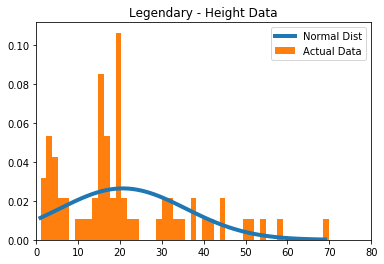

In [6]:
xs = np.arange(l_height.min(), l_height.max())
fit = stats.norm.pdf(xs, np.mean(l_height), np.std(l_height))
plt.plot(xs, fit, label='Normal Dist', lw=4)
plt.hist(l_height, density=True, label='Actual Data', bins=50);
plt.xlim((0, 80))
plt.title('Legendary - Height Data')
plt.legend();

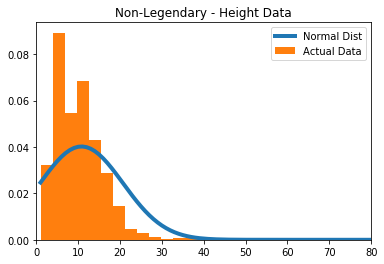

In [7]:
xs = np.arange(n_height.min(), n_height.max())
fit = stats.norm.pdf(xs, np.mean(n_height), np.std(n_height))
plt.plot(xs, fit, label='Normal Dist', lw = 4)
plt.hist(n_height, density=True, label='Actual Data', bins = 50);
plt.xlim((0, 80))
plt.title('Non-Legendary - Height Data')
plt.legend();

# Compare the two height distributions (Legendary vs Non-Legendary Height)

In [8]:
t_val = ttest_ind(l_height, n_height).statistic
p_val = ttest_ind(l_height, n_height).pvalue

In [9]:
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


If p-value <= alpha significance value of 0.01, then reject the null hypothesis, and the result is statistically significant. If p-value >= alpha significance value of 0.01, then fail to reject the null hypothesis, and the result is statistically nonsignificant.

Research Question: Legendary Pokémon are extremely large in size. Null Hypothesis: Legendary Pokémon are not large in size. Since there is a significant difference, we reject the null hypothesis and say that Legendary Pokémons are large in size.

# Multivariate Regression

In [10]:
pv = pd.pivot_table(data=statsDF, values='Legend', index=['Height'])

In [11]:
outcome, predictors = patsy.dmatrices('Legend ~ Height', statsDF)
mod = sm.OLS(outcome , predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Legend   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     55.40
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           2.53e-13
Time:                        13:48:15   Log-Likelihood:                -84.526
No. Observations:                 807   AIC:                             173.1
Df Residuals:                     805   BIC:                             182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0084      0.014      0.605      0.5

In [12]:
res.pvalues

array([  5.45124504e-01,   2.53077037e-13])

The OLS model that predicts whether a Pokémon is Legendary based on height produces the result of p-value 0.000 (not exactly 0, but close - shown by the res pvalues), which is less than the alpha significance value of 0.01. This shows that the result is highly statistically significant, and we reject the null hypothesis and claim that Legendary Pokémon tend to have large Heights. 

In [13]:
pv = pd.pivot_table(data=statsDF, values='Legend', index=['Height', 'Weight'])

In [14]:
outcome_1, predictors_1 = patsy.dmatrices('Legend ~ Height + Weight', statsDF)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Legend   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     42.80
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           2.17e-18
Time:                        13:48:15   Log-Likelihood:                -70.559
No. Observations:                 807   AIC:                             147.1
Df Residuals:                     804   BIC:                             161.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0168      0.014      1.221      0.2

In [15]:
res_1.pvalues

array([  2.22629973e-01,   1.44568860e-02,   1.33603658e-07])

The OLS model predicting whether a Pokémon is Legendary based on Height and Weight produces a p-value of 0.014, which is greater than the alpha significance value. This tells us that Height is not statistically significant in this case, and we fail to reject the null hypothesis - that height does not predict if a Pokémon is Legendary. However, the p-value for Weight is 0.000 and, like above, is highly statistically significant. Therefore we can say that heavy weight is a strong indicator of a Legendary Pokémon.       